<a href="https://colab.research.google.com/github/afjolahmed/afjol/blob/master/earthquke_prediction_BY_regression_and_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install basemap
!pip install catboost

In [ ]:
%%capture
!wget -O Datasets_for_Earthquakes.zip https://www.dropbox.com/sh/tlkp9clmpnaz0av/AADivNj5M4wFeR7WDZE0SzEba?dl=0
!unzip Datasets_for_Earthquakes.zip

In [ ]:
import time
import datetime

import numpy as np
import pandas as pd
import dateutil.parser
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.set_printoptions(suppress=True)

In [ ]:
def ValueCounts(df):
    for c in df.columns:
        print(c+"\n"+"-----------------"+"\n")
        print(df[c].value_counts().to_frame())
        print("\n"+"******************"+"\n")

def UniqueValues(df,l):
    for c in l:
        print(c+"\n"+"-----------------"+"\n")
        print(df[c].unique())
        print("Number of Unique Values: ",len(df[c].unique()))
        print("\n"+"******************"+"\n")

data prepossesing 

In [ ]:
from google.colab import drive



In [ ]:
df_japan1= pd.read_csv("/content/japan-20190101_20211203_query.csv")

df_japan2= pd.read_csv("/content/japan_20190101-20211009_query.csv")

df_tonga = pd.read_csv("/content/tonga_20210101_20220117_query.csv")

df_haiti = pd.read_csv("/content/haiti_20210814_query.csv")

In [ ]:
df_japan1.drop(columns=["nst","status","locationSource","magSource","type","id","net"],inplace=True)

df_japan2.drop(columns=["nst","status","locationSource","magSource","type","id","net"],inplace=True)

df_tonga. drop(columns=["nst","status","locationSource","magSource","type","id","net"],inplace=True)

df_haiti. drop(columns=["nst","status","locationSource","magSource","type","id","net"],inplace=True)


DATA MERGED

In [ ]:

df_data1 = pd.concat([df_japan1, df_japan2,df_tonga,df_haiti], ignore_index=True, sort=False)
df_data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8145 entries, 0 to 8144
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             8145 non-null   object 
 1   latitude         8145 non-null   float64
 2   longitude        8145 non-null   float64
 3   depth            8145 non-null   float64
 4   mag              8145 non-null   float64
 5   magType          8145 non-null   object 
 6   gap              8144 non-null   float64
 7   dmin             8140 non-null   float64
 8   rms              8145 non-null   float64
 9   updated          8145 non-null   object 
 10  place            8122 non-null   object 
 11  horizontalError  8145 non-null   float64
 12  depthError       8145 non-null   float64
 13  magError         8143 non-null   float64
 14  magNst           8144 non-null   float64
dtypes: float64(11), object(4)
memory usage: 954.6+ KB


In [ ]:
df_data1.dropna(inplace=True)
df_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8115 entries, 0 to 8144
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             8115 non-null   object 
 1   latitude         8115 non-null   float64
 2   longitude        8115 non-null   float64
 3   depth            8115 non-null   float64
 4   mag              8115 non-null   float64
 5   magType          8115 non-null   object 
 6   gap              8115 non-null   float64
 7   dmin             8115 non-null   float64
 8   rms              8115 non-null   float64
 9   updated          8115 non-null   object 
 10  place            8115 non-null   object 
 11  horizontalError  8115 non-null   float64
 12  depthError       8115 non-null   float64
 13  magError         8115 non-null   float64
 14  magNst           8115 non-null   float64
dtypes: float64(11), object(4)
memory usage: 1014.4+ KB


In [ ]:
df_data1.drop_duplicates("time" , keep='first',inplace=True)
df_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6296 entries, 0 to 8144
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             6296 non-null   object 
 1   latitude         6296 non-null   float64
 2   longitude        6296 non-null   float64
 3   depth            6296 non-null   float64
 4   mag              6296 non-null   float64
 5   magType          6296 non-null   object 
 6   gap              6296 non-null   float64
 7   dmin             6296 non-null   float64
 8   rms              6296 non-null   float64
 9   updated          6296 non-null   object 
 10  place            6296 non-null   object 
 11  horizontalError  6296 non-null   float64
 12  depthError       6296 non-null   float64
 13  magError         6296 non-null   float64
 14  magNst           6296 non-null   float64
dtypes: float64(11), object(4)
memory usage: 787.0+ KB


In [ ]:
df_data1.head()

,time,latitude,longitude,depth,mag,magType,gap,dmin,rms,updated,place,horizontalError,depthError,magError,magNst
0,2019-01-01T22:05:38.960Z,35.6831,140.2344,66.24,4.4,mb,141.0,1.855,0.66,2019-03-08T17:50:13.040Z,"3 km S of Sakura, Japan",2.9,8.6,0.115,22.0
1,2019-01-02T15:11:16.070Z,39.4417,143.6408,21.01,4.5,mb,110.0,2.390,0.85,2019-03-08T17:50:21.040Z,"145 km E of Yamada, Japan",9.1,6.4,0.180,9.0
2,2019-01-03T09:10:28.440Z,33.0514,130.4705,10.00,4.7,mb,97.0,0.348,0.60,2020-07-10T17:21:55.993Z,"2 km NE of ?muta, Japan",4.9,1.8,0.075,54.0
3,2019-01-03T20:42:45.260Z,30.3888,138.0987,451.33,4.0,mb,113.0,3.085,0.75,2019-03-08T17:50:21.040Z,"Izu Islands, Japan region",11.0,5.8,0.073,50.0
4,2019-01-04T22:05:07.080Z,32.8198,140.1248,98.35,4.3,mb,147.0,0.394,0.46,2019-03-08T17:50:21.040Z,"233 km SSE of Shimoda, Japan",12.0,4.7,0.080,44.0


In [ ]:


df_data1.describe()

,latitude,longitude,depth,mag,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000
mean,1.568308,4.537618,128.286726,4.526898,124.324333,3.548354,0.721158,9.283529,4.744245,0.123837,40.395172
std,29.526217,159.698076,192.638990,0.481565,51.462904,3.368261,0.257276,3.582415,3.688366,0.058645,66.364917
min,-34.777400,-179.995700,2.000000,2.500000,10.000000,0.027000,0.030000,0.280000,0.150000,0.010000,1.000000
25%,-23.806150,-176.981125,10.000000,4.300000,87.000000,1.274750,0.550000,6.975000,1.900000,0.080000,12.000000
50%,-17.498850,131.182400,28.940000,4.500000,123.000000,2.650500,0.710000,9.000000,2.000000,0.118000,19.000000
75%,33.452725,142.515950,131.720000,4.700000,150.250000,4.610250,0.890000,11.600000,7.300000,0.159000,37.000000
max,46.681600,179.999300,669.460000,8.100000,348.000000,43.302000,1.620000,31.700000,38.200000,0.558000,742.000000


In [ ]:
UniqueValues(df_data1,df_data1.columns)

time
-----------------

['2019-01-01T22:05:38.960Z' '2019-01-02T15:11:16.070Z'
 '2019-01-03T09:10:28.440Z' ... '2021-07-17T13:24:00.800Z'
 '2021-07-17T05:06:52.430Z' '2021-07-17T02:43:34.920Z']
Number of Unique Values:  6296

******************

latitude
-----------------

[35.6831 39.4417 33.0514 ... 17.9243 18.209  19.6276]
Number of Unique Values:  6213

******************

longitude
-----------------

[140.2344 143.6408 130.4705 ... -67.2168 -63.5315 -66.8485]
Number of Unique Values:  6174

******************

depth
-----------------

[ 66.24  21.01  10.   ... 119.    75.56 101.  ]
Number of Unique Values:  3041

******************

mag
-----------------

[4.4  4.5  4.7  4.   4.3  4.6  5.7  4.1  4.2  4.9  6.3  5.   4.8  5.1
 5.5  5.2  5.4  5.9  5.3  6.   5.6  6.2  3.2  3.9  6.4  3.7  6.1  5.8
 3.4  3.5  7.   3.8  6.6  3.1  2.7  7.1  6.9  7.3  6.5  8.1  7.4  7.7
 2.57 2.56 2.75 3.64 3.07 3.56 2.58 2.54 2.95 3.   4.08 2.85 2.66 7.2
 2.6  3.13 2.84 2.64 3.21 3.23 3.12 3.35 2.52 3.36 

In [ ]:
df_data1['timestamp'] = df_data1['time'].apply(lambda x: time.mktime(dateutil.parser.isoparse(x).timetuple()))
df_data1_=df_data1[["timestamp",'latitude','longitude','depth','mag','magType']]
df_data1_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6296 entries, 0 to 8144
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  6296 non-null   float64
 1   latitude   6296 non-null   float64
 2   longitude  6296 non-null   float64
 3   depth      6296 non-null   float64
 4   mag        6296 non-null   float64
 5   magType    6296 non-null   object 
dtypes: float64(5), object(1)
memory usage: 344.3+ KB


In [ ]:

df_data1_.drop_duplicates("timestamp" , keep='first',inplace=True)
df_data1_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6277 entries, 0 to 8144
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  6277 non-null   float64
 1   latitude   6277 non-null   float64
 2   longitude  6277 non-null   float64
 3   depth      6277 non-null   float64
 4   mag        6277 non-null   float64
 5   magType    6277 non-null   object 
dtypes: float64(5), object(1)
memory usage: 343.3+ KB


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df_data1_.head()

,timestamp,latitude,longitude,depth,mag,magType
0,1.546380e+09,35.6831,140.2344,66.24,4.4,mb
1,1.546442e+09,39.4417,143.6408,21.01,4.5,mb
2,1.546507e+09,33.0514,130.4705,10.00,4.7,mb
3,1.546548e+09,30.3888,138.0987,451.33,4.0,mb
4,1.546640e+09,32.8198,140.1248,98.35,4.3,mb


In [ ]:
df_data1_.describe()

,timestamp,latitude,longitude,depth,mag
count,6.277000e+03,6277.000000,6277.000000,6277.000000,6277.000000
mean,1.610804e+09,1.464309,4.124146,128.516126,4.525514
std,2.312496e+07,29.509400,159.762352,192.838082,0.480769
min,1.546380e+09,-34.777400,-179.995700,2.000000,2.500000
25%,1.605292e+09,-23.849200,-176.984900,10.000000,4.300000
50%,1.615516e+09,-17.537600,131.100000,28.850000,4.500000
75%,1.627149e+09,33.360800,142.529000,132.760000,4.700000
max,1.642278e+09,46.681600,179.999300,669.460000,8.100000


In [ ]:
df_US_survey= pd.read_csv("/content/Significant_Earthquakes_1965_2016_US_GEOLOGICAL_SURVEY.csv")
df_US_survey_=df_US_survey[['Date', 'Time', 'Latitude', 'Longitude','Depth', 'Magnitude', 'Magnitude Type']]
df_US_survey_.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,Magnitude Type
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0,MW
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8,MW
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2,MW
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8,MW
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8,MW


In [ ]:
%%capture
timestamp = []
for d, t in zip(df_US_survey_['Date'], df_US_survey_['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')

timeStamp = pd.Series(timestamp)
df_US_survey_['timestamp'] = timeStamp.values
df_US_survey_['timestamp'] = pd.to_numeric(df_US_survey_['timestamp'],errors = 'coerce')
df_data2=df_US_survey_[["timestamp",'Latitude','Longitude','Depth','Magnitude','Magnitude Type']]
df_data2.info()

In [ ]:
df_data2_ = df_data2.rename(columns={'timestamp': 'timestamp', 'Latitude': 'latitude','Longitude': 'longitude','Depth': 'depth','Magnitude': 'mag','Magnitude Type': 'magType'})
df_data2_.drop_duplicates("timestamp" , keep='first',inplace=True)
df_data2_.dropna(inplace=True)
df_data2_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23387 entries, 0 to 23411
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  23387 non-null  float64
 1   latitude   23387 non-null  float64
 2   longitude  23387 non-null  float64
 3   depth      23387 non-null  float64
 4   mag        23387 non-null  float64
 5   magType    23387 non-null  object 
dtypes: float64(5), object(1)
memory usage: 1.2+ MB


In [ ]:
df_data2_.head()

,timestamp,latitude,longitude,depth,mag,magType
0,-157630542.0,19.246,145.616,131.6,6.0,MW
1,-157465811.0,1.863,127.352,80.0,5.8,MW
2,-157355642.0,-20.579,-173.972,20.0,6.2,MW
3,-157093817.0,-59.076,-23.557,15.0,5.8,MW
4,-157026430.0,11.938,126.427,15.0,5.8,MW


In [ ]:
df_data2_.describe()

,timestamp,latitude,longitude,depth,mag
count,2.338700e+04,23387.000000,23387.000000,23387.000000,23387.000000
mean,7.301476e+08,1.652218,39.758246,70.800277,5.882515
std,4.554363e+08,30.104762,125.475295,122.651387,0.423151
min,-1.576305e+08,-77.080000,-179.997000,-1.100000,5.500000
25%,3.556818e+08,-18.685500,-76.208250,14.600000,5.600000
50%,7.549138e+08,-3.591000,104.032000,33.000000,5.700000
75%,1.126927e+09,26.094500,145.044300,54.050000,6.000000
max,1.483129e+09,86.005000,179.998000,700.000000,9.100000


In [ ]:
df_mergedT= pd.concat([df_data1_, df_data2_], ignore_index=True, sort=False)
df_mergedT.drop_duplicates("timestamp" , keep='first',inplace=True)
df_mergedT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29664 entries, 0 to 29663
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  29664 non-null  float64
 1   latitude   29664 non-null  float64
 2   longitude  29664 non-null  float64
 3   depth      29664 non-null  float64
 4   mag        29664 non-null  float64
 5   magType    29664 non-null  object 
dtypes: float64(5), object(1)
memory usage: 1.6+ MB


MARGE

In [ ]:
df_mergedT.head()

,timestamp,latitude,longitude,depth,mag,magType
0,1.546380e+09,35.6831,140.2344,66.24,4.4,mb
1,1.546442e+09,39.4417,143.6408,21.01,4.5,mb
2,1.546507e+09,33.0514,130.4705,10.00,4.7,mb
3,1.546548e+09,30.3888,138.0987,451.33,4.0,mb
4,1.546640e+09,32.8198,140.1248,98.35,4.3,mb


In [ ]:
df_mergedT.describe()

,timestamp,latitude,longitude,depth,mag
count,2.966400e+04,29664.000000,29664.000000,29664.000000,29664.000000
mean,9.164973e+08,1.612456,32.217953,83.013141,5.595369
std,5.413232e+08,29.979372,134.255626,142.420412,0.705184
min,-1.576305e+08,-77.080000,-179.997000,-1.100000,2.500000
25%,4.787954e+08,-21.139100,-94.724000,10.000000,5.500000
50%,9.602873e+08,-4.456500,114.309350,33.000000,5.700000
75%,1.403560e+09,29.619050,143.669250,60.615000,5.900000
max,1.642278e+09,86.005000,179.999300,700.000000,9.100000


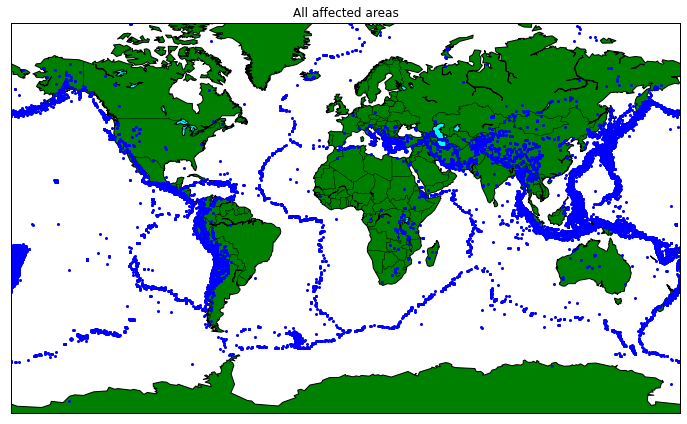

In [ ]:
#!pip install mpl_toolkits.basemap
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = df_mergedT["longitude"].tolist()
latitudes = df_mergedT["latitude"].tolist()

x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='green',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

In [ ]:

def mag_classification(mag):
    if mag in list(np.around(np.arange(2.5,5.5,0.1),2)):
        return 'minor_damage_level1'

    else:
        return 'major_damage_level2'

df_mergedT = df_mergedT[df_mergedT['timestamp'] >= 0]
df_mergedT['earthQuake_damage'] = df_mergedT['mag'].apply(mag_classification)
df_mergedT.earthQuake_damage.value_counts().sort_index()
df_mergedT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28208 entries, 0 to 29663
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          28208 non-null  float64
 1   latitude           28208 non-null  float64
 2   longitude          28208 non-null  float64
 3   depth              28208 non-null  float64
 4   mag                28208 non-null  float64
 5   magType            28208 non-null  object 
 6   earthQuake_damage  28208 non-null  object 
dtypes: float64(5), object(2)
memory usage: 1.7+ MB


In [ ]:

df_mergedT.head()

,timestamp,latitude,longitude,depth,mag,magType,earthQuake_damage
0,1.546380e+09,35.6831,140.2344,66.24,4.4,mb,minor_damage_level1
1,1.546442e+09,39.4417,143.6408,21.01,4.5,mb,minor_damage_level1
2,1.546507e+09,33.0514,130.4705,10.00,4.7,mb,minor_damage_level1
3,1.546548e+09,30.3888,138.0987,451.33,4.0,mb,minor_damage_level1
4,1.546640e+09,32.8198,140.1248,98.35,4.3,mb,minor_damage_level1


In [ ]:

df_mergedT.describe()

,timestamp,latitude,longitude,depth,mag
count,2.820800e+04,28208.000000,28208.000000,28208.000000,28208.000000
mean,9.678609e+08,1.062390,30.720194,83.871646,5.572986
std,5.042671e+08,29.826853,134.793549,143.813585,0.708931
min,6.186000e+04,-77.080000,-179.997000,-1.100000,2.500000
25%,5.489026e+08,-21.437400,-99.542250,10.000000,5.500000
50%,1.003096e+09,-4.826500,108.337500,33.000000,5.600000
75%,1.431238e+09,29.001275,143.409000,61.100000,5.900000
max,1.642278e+09,86.005000,179.999300,700.000000,9.100000


In [ ]:


df_mergedT.to_csv("mergedEarthquake_data.csv", encoding='utf-8', index=False)


classification task 

In [ ]:

XC=df_mergedT[["timestamp",'latitude','longitude',"depth"]]
yC=df_mergedT[["earthQuake_damage"]]

X_train_C, X_testVal_C, y_train_C, y_testVal_C = train_test_split(XC, yC, test_size=0.4, random_state=42,stratify=yC)
print(X_train_C.shape, X_testVal_C.shape, y_train_C.shape, y_testVal_C.shape)

X_val_C, X_test_C, y_val_C, y_test_C = train_test_split(X_testVal_C, y_testVal_C, test_size=0.5, random_state=42,stratify=y_testVal_C)
print(X_val_C.shape, X_test_C.shape, y_val_C.shape, y_test_C.shape)

(16924, 4) (11284, 4) (16924, 1) (11284, 1)
(5642, 4) (5642, 4) (5642, 1) (5642, 1)


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
models = {
    "LogisticRegression":          LogisticRegression(),
    "KNeighborsClassifier":        KNeighborsClassifier(), 
    "Support Vector Machine":      SVC(),
    "DecisionTreeClassifier":      DecisionTreeClassifier(),
    "RandomForestClassifier":      RandomForestClassifier(),
    "BaggingClassifier":           BaggingClassifier(),
    "AdaBoostClassifier":          AdaBoostClassifier(),
    "CatBoostClassifier":          CatBoostClassifier(verbose=False),
    "LGBMClassifier":              LGBMClassifier(),
    "GradientBoostingClassifier":  GradientBoostingClassifier(),
    "XGBClassifier":               XGBClassifier()
}

In [ ]:

for name, model in models.items():
    print(f'Using model          : {name}')

    model.fit(X_train_C.values, y_train_C.values.ravel())
    
    print(f"Train Accuracy       : {model.score(X_train_C.values,y_train_C.values)}")
    print(f'Val   Accuracy       : {model.score(X_val_C.values , y_val_C.values)}')
    print(f'Test  Accuracy       : {accuracy_score(y_test_C.values, model.predict(X_test_C.values))}')
    print("The Classification Report:")
    print(classification_report(y_test_C.values, model.predict(X_test_C.values), zero_division=1,labels=['major_damage_level2', 'minor_damage_level1']))
    
    print('-'*30)
    print('*'*30)

Using model          : LinearRegression


ValueError: ignored

XGBOOST BEST CLASSIFIER


In [ ]:
XGB = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, objective='binary:logistic',random_state=0)
XGB.fit(X_train_C.values, y_train_C.values.ravel())

print(f"Train Accuracy       : {round(XGB.score(X_train_C.values,y_train_C.values),3)}")
print(f'Val   Accuracy       : {round(XGB.score(X_val_C.values , y_val_C.values),3)}')
print(f'Test  Accuracy       : {round(accuracy_score(y_test_C.values, XGB.predict(X_test_C.values)),3)}')
print("The Classification Report:")
print(classification_report(y_test_C.values, XGB.predict(X_test_C.values), zero_division=1,labels=['major_damage_level2', 'minor_damage_level1']))

Train Accuracy       : 0.992
Val   Accuracy       : 0.991
Test  Accuracy       : 0.991
The Classification Report:
                     precision    recall  f1-score   support

major_damage_level2       1.00      0.99      0.99      4466
minor_damage_level1       0.96      1.00      0.98      1176

           accuracy                           0.99      5642
          macro avg       0.98      0.99      0.99      5642
       weighted avg       0.99      0.99      0.99      5642



In [ ]:
timeIOS= "2019-01-01T22:05:38.960Z"
timestamp=time.mktime(dateutil.parser.isoparse(timeIOS).timetuple())
Latitude=46.347
Longitudes=152.013
Depth=96.2

ModelInputsArray = np.asarray([[timestamp, Latitude, Longitudes, Depth]], dtype=np.float32)
probabilty       =np.round(np.max(XGB.predict_proba(ModelInputsArray)),2)
class_           =XGB.predict(ModelInputsArray)[0]
print(f"The Earthquake damage level is: {class_} with Probability {probabilty}")

The Earthquake damage level is: minor_damage_level1 with Probability 0.9300000071525574


regression task 

In [ ]:

XR=df_mergedT[["timestamp",'latitude','longitude']]
yR=df_mergedT[["depth"]]

X_train_R, X_testVal_R, y_train_R, y_testVal_R = train_test_split(XR, yR, test_size=0.4, random_state=42)
print(X_train_R.shape, X_testVal_R.shape, y_train_R.shape, y_testVal_R.shape)

X_val_R, X_test_R, y_val_R, y_test_R = train_test_split(X_testVal_R, y_testVal_R, test_size=0.5, random_state=42)
print(X_val_R.shape, X_test_R.shape, y_val_R.shape, y_test_R.shape)

(16924, 3) (11284, 3) (16924, 1) (11284, 1)
(5642, 3) (5642, 3) (5642, 1) (5642, 1)


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor,Pool
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import BaggingRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

models = {
    "LinearRegression":            LinearRegression(),
    "Ridge":                       Ridge(),
    "Lasso":                       Lasso(),
    "ElasticNet":                  ElasticNet(),
    "KNeighborsRegressor":         KNeighborsRegressor(), 
    "DecisionTreeRegressor":       DecisionTreeRegressor(),
    "RandomForestRegressor":       RandomForestRegressor(),
    "BaggingRegressor":            BaggingRegressor(),
    "AdaBoostRegressor":           AdaBoostRegressor(),
    "CatBoostRegressor":           CatBoostRegressor(verbose=False),
    "LGBMRegressor":               LGBMRegressor(),
    "GradientBoostingRegressor":   GradientBoostingRegressor(),
    "XGBRegressor":                XGBRegressor(objective="reg:squarederror")
}

In [ ]:

for name, model in models.items():
    print(f'Using model    : {name}')
    model.fit(X_train_R.values, y_train_R.values.ravel())
    print(f"train score    : {model.score(X_train_R.values,y_train_R.values)}")
    print(f'RMSE Train     : {(mean_squared_error(y_train_R.values, model.predict(X_train_R.values)))**0.5}')
    print(f'R2 Val         : {r2_score(y_val_R.values, model.predict(X_val_R.values))}')
    print(f'RMSE Val       : {(mean_squared_error(y_val_R.values, model.predict(X_val_R.values))**0.5)}')
    print(f'R2 Test        : {r2_score(y_test_R.values, model.predict(X_test_R.values))}')
    print(f'RMSE Test      : {(mean_squared_error(y_test_R.values, model.predict(X_test_R.values))**0.5)}')
    print('-'*30)

Using model    : LinearRegression
train score    : 0.03497663712132293
RMSE Train     : 138.83958657582104
R2 Val         : 0.03102355071093643
RMSE Val       : 145.30624141906725
R2 Test        : 0.029093680917204212
RMSE Test      : 145.04638596149601
------------------------------
Using model    : Ridge
train score    : 0.03497663712132271
RMSE Train     : 138.83958657582107
R2 Val         : 0.03102355055061201
RMSE Val       : 145.30624143108824
R2 Test        : 0.029093680838556457
RMSE Test      : 145.04638596737072
------------------------------
Using model    : Lasso
train score    : 0.034976580201759644
RMSE Train     : 138.83959067037918
R2 Val         : 0.031012919377028436
RMSE Val       : 145.3070385462499
R2 Test        : 0.029088065194014523
RMSE Test      : 145.04680543511535
------------------------------
Using model    : ElasticNet
train score    : 0.03497661528670859
RMSE Train     : 138.83958814651297
R2 Val         : 0.031016889127054914
RMSE Val       : 145.306740

RANDOM FOREST BEST REGRESSOR

In [ ]:
Rf = RandomForestRegressor(n_estimators=100, random_state=0, criterion='squared_error', max_depth=20,min_samples_split=5)
Rf.fit(X_train_R.values, y_train_R.values.ravel())

print(f"Train Score    : {round(Rf.score(X_train_R.values,y_train_R.values),2)}")
print(f'RMSE Train     : {round((mean_squared_error(y_train_R.values, Rf.predict(X_train_R.values)))**0.5)}')
print(f'R2 Val         : {round(r2_score(y_val_R.values, Rf.predict(X_val_R.values)),2)}')
print(f'RMSE Val       : {round(mean_squared_error(y_val_R.values, Rf.predict(X_val_R.values))**0.5)}')
print(f'R2 Test        : {round(r2_score(y_test_R.values, Rf.predict(X_test_R.values)),1)}')
print(f'RMSE Test      : {round((mean_squared_error(y_test_R.values, Rf.predict(X_test_R.values))**0.5))}')
print('-'*30)



Train Score    : 0.97
RMSE Train     : 25
R2 Val         : 0.9
RMSE Val       : 47
R2 Test        : 0.9
RMSE Test      : 50
------------------------------


In [ ]:
timeIOS= "2019-01-01T22:05:38.960Z"
timestamp=time.mktime(dateutil.parser.isoparse(timeIOS).timetuple())
Latitude=46.347
Longitudes=152.013
################################
ModelInputsArray_Reg = np.array([[timestamp, Latitude, Longitudes]], dtype=np.float32)
depthPred            =Rf.predict(ModelInputsArray_Reg)
print(f"The Earthquake Depth is: {depthPred}")

The Earthquake Depth is: [76.27804743]


combine two model

In [ ]:



timeIOS= "2019-01-01T22:05:38.960Z"
timestamp=time.mktime(dateutil.parser.isoparse(timeIOS).timetuple())
Latitude=46.347
Longitudes=152.013
################################
ModelInputsArray_Reg = np.array([[timestamp, Latitude, Longitudes]], dtype=np.float32)
depthPred            = Rf.predict(ModelInputsArray_Reg)
print(f"The Earthquake Depth is: {np.round(depthPred,2)}")
###############################
ModelInputsArray_Class = np.array([[timestamp, Latitude, Longitudes, float(depthPred)]], dtype=np.float32)
probabilty             = np.round(np.max(XGB.predict_proba(ModelInputsArray_Class)),2)
class_                 = XGB.predict(ModelInputsArray_Class)[0]
print(f"The Earthquake damage level is: {class_} with Probability {probabilty}")

The Earthquake Depth is: [76.28]
The Earthquake damage level is: minor_damage_level1 with Probability 0.9300000071525574
